#### Divide-and-Conquer

It is a recursive algorithmic design method with three steps:

1. **Divide**: If the input data’s size is larger than or equal to a defined threshold, the input data are divided into two or more exclusive subsets. If the input data’s size is smaller than the threshold, use a straightforward method to solve the problem and return the solution.
2. **Conquer**: With the subsets, the subproblems are recursively solved with the above step.
3. **Combine**: The solutions from subproblems are merged into one solution that solves the original problem.

In the above Divide-and-Conquer, the threshold could be one or two elements.

### Selection Sort

<img src='https://mth252.fastzhong.com/notebooks/sort_selection.gif' style='width: 70%'>

Starts by sorting the array from left to right.

For position $i$:
- Sorted starts from $[0, i)$
- Unsorted starts from $[i, n)$

At each iteration, it finds the smallest from `arr[i, ..., n - 1]` and place at `arr[i]`. Thinking of it rolling from left to right.

The time complexity is $\frac{n(n+1)}{2}$.

In [49]:
arr = [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]

In [11]:
def selection_sort(arr_): 
    n = len(arr_)

    for i in range(n - 1): 
        min_pos = i 
        
        for j in range(i+1, n): 
            if arr_[j] < arr_[min_pos]:
                min_pos = j 
        
        if min_pos != i: 
            arr_[i], arr_[min_pos] = arr_[min_pos], arr_[i]
    
    return arr_

print("        sample: ", arr)
print("sort_selection: ", selection_sort(list(arr)))

        sample:  [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
sort_selection:  [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


### Insertion Sort

<img src='https://mth252.fastzhong.com/notebooks/sort_insertion.gif' style='width: 70%'>

Starts by sorting the array from left to right.

For position $i$:
- Sorted starts from $[0, i)$
- Unsorted starts from $[i, n)$ 

Insert to the proper position on the left.

The time complexity $O(n^2)$ (if already sorted it is $O(n)$).

In [15]:
def sort_insertion(arr_): 
    i = 0

    while i <= len(arr_) - 1:
        j = i

        while j - 1 >= 0: 
            if arr_[j] < arr_[j - 1]: 
                arr_[j], arr_[j - 1] = arr_[j - 1], arr_[j]
            else:
                break 
            j -= 1
        i += 1

    return arr_

print("        sample: ", arr)
print("sort_insertion: ", sort_insertion(list(arr)))

        sample:  [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
sort_insertion:  [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


### Bubble Sort

<img src='https://mth252.fastzhong.com/notebooks/sort_bubble.gif' style='width: 70%'>

Starts by sorting the array from right to left.

For position $i$:
- Sorted starts from $[n - i, n)$
- Unsorted starts from $[0, n - i - 1)$ 

Bubble the biggest to `arr[n - i - 1]`.

The time complexity is $O(n^2)$.

In [42]:
def bubble_sort(arr_): 
    n = len(arr_)
    i = n - 1

    while i != 0:
        for j in range(i):
            if arr_[j] > arr_[j + 1]:
                arr_[j], arr_[j + 1] = arr_[j + 1], arr_[j]
        i -= 1

    return arr_

print("        sample: ", arr)
print("sort_bubble_: ", bubble_sort(list(arr)))

        sample:  [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
sort_bubble_:  [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


### Merge Sort

<img src='https://mth252.fastzhong.com/notebooks/sort_merge.gif' style='width: 70%'>

This uses the divide-and-conquer methodology. Think of it splitting them up to small parts of `2` and then sort and slowly merge them up.

It recursively sort and merge two sorted array using params `l`, `m` and `r` (e.g. sort `arr[m + 1: r]` and `[1:m]`).

| Input sequences tree | Output sequences tree |
| -- | -- |
| 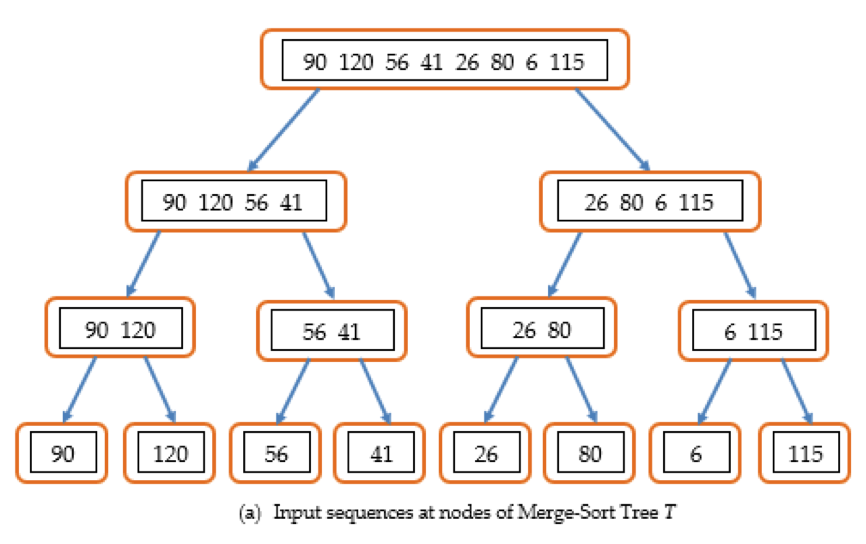 | 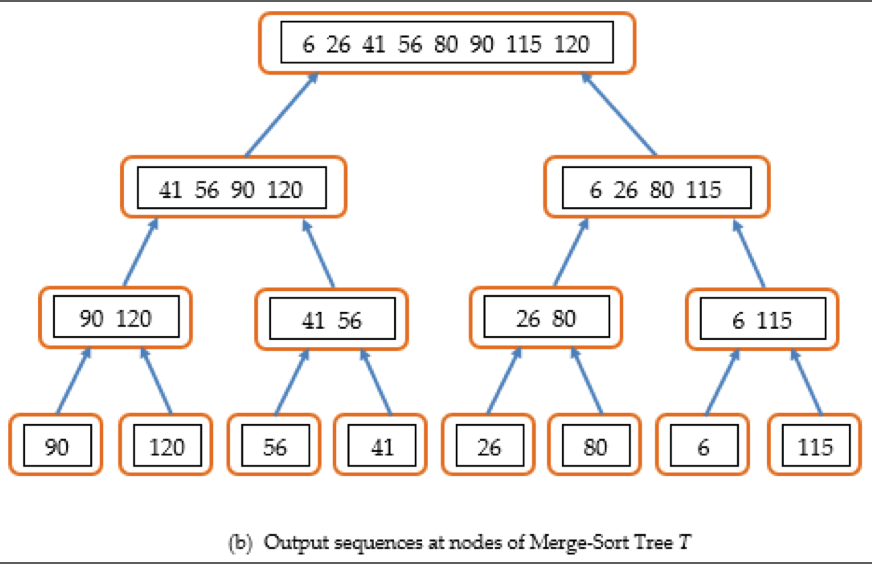 |

The time complexity is $O(n\text{log}(n))$, and the space complexity is $O(n)$.

At each level $i = 1, .., \text{log}(n)$, there are $2^i$ sub-problems, each of size $\frac{n}{2^i}$, and the total number of operations at level $i$ is $i \leq 2^i c(\frac{n}{2^i}) = cn$, hence the complexity on each level is $O(n)$.

In [50]:
def merge_sort(arr_, l = None, r = None):
    l = 0 if l is None else l
    r = len(arr_) - 1 if r is None else r

    if l >= r:
        return arr_

    m = l + (r - l) // 2

    merge_sort(arr_, l, m)
    merge_sort(arr_, m + 1, r)
    
    if arr_[m] > arr_[m + 1]:
        tmp = arr_[l:r + 1]
        p1 = l
        p2 = m + 1
        cur = l

        while cur <= r:
            if p1 > m: 
                arr_[cur] = tmp[p2 - l]
                p2 += 1

            elif p2 > r: 
                arr_[cur] = tmp[p1 - l]
                p1 += 1

            else: 
                if tmp[p1 - l] <= tmp[p2 - l]: 
                    arr_[cur] = tmp[p1 - l]
                    p1 += 1 

                else:
                    arr_[cur] = tmp[p2 - l]
                    p2 += 1
            cur += 1
        return arr_

    return arr_

print("             sample: ", arr)
print("      sort_merge_v1: ", merge_sort(list(arr)))

             sample:  [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
      sort_merge_v1:  [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


### Quick Sort

<img src='https://mth252.fastzhong.com/notebooks/sort_quick.gif' style='width: 70%'>

This uses the divide-and-conquer methodology.

Recursive split by the partition and from it select `v`, so that `[l, p - 1] <= v` and `[p + 1, r] > v`. Then recursively sort `[l, p - 1]` and `[p + 1, r]` partitions with the same methodology.

| Input sequences tree | Output sequences tree |
| -- | -- |
| 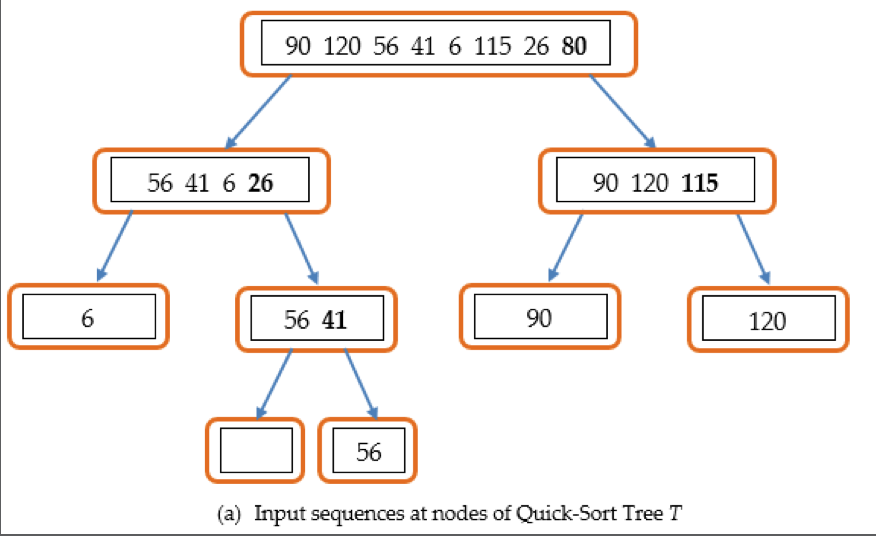 | 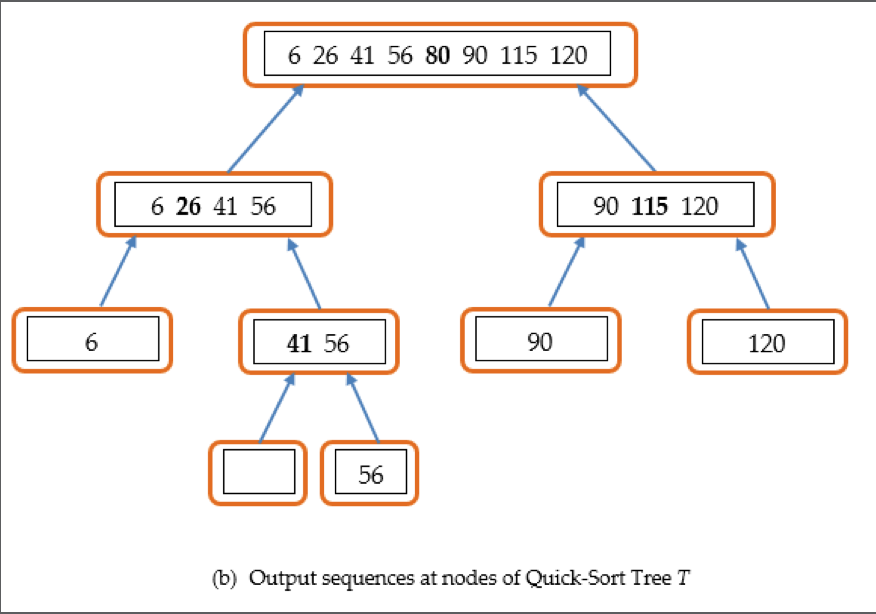 |

The time complexity (worst case) is: $O(n^2)$.

In [53]:
from random import randint

def partition(arr_, l, r):
    p = randint(l, r)
    arr_[l], arr_[p] = arr_[p], arr_[l]
    n = len(arr_)
    p = l
    
    for i in range(l + 1, r + 1):     
        if arr_[i] < arr_[l]:
            p += 1
            arr_[p], arr_[i] = arr_[i], arr_[p]
    arr_[l], arr_[p] = arr_[p], arr_[l]
    return p 


def quick_sort(arr_, l = None, r = None):
    l = 0 if l is None else l
    r = len(arr_) - 1 if r is None else r
    
    if l >= r:
        return arr_
    
    p = partition(arr_, l, r)
    quick_sort(arr_, l, p - 1)
    quick_sort(arr_, p + 1, r)
    return arr_

print("             sample: ", arr)
print("      sort_quick_v1: ", quick_sort(list(arr)))

             sample:  [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
      sort_quick_v1:  [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


| | |
| -- | -- |
| 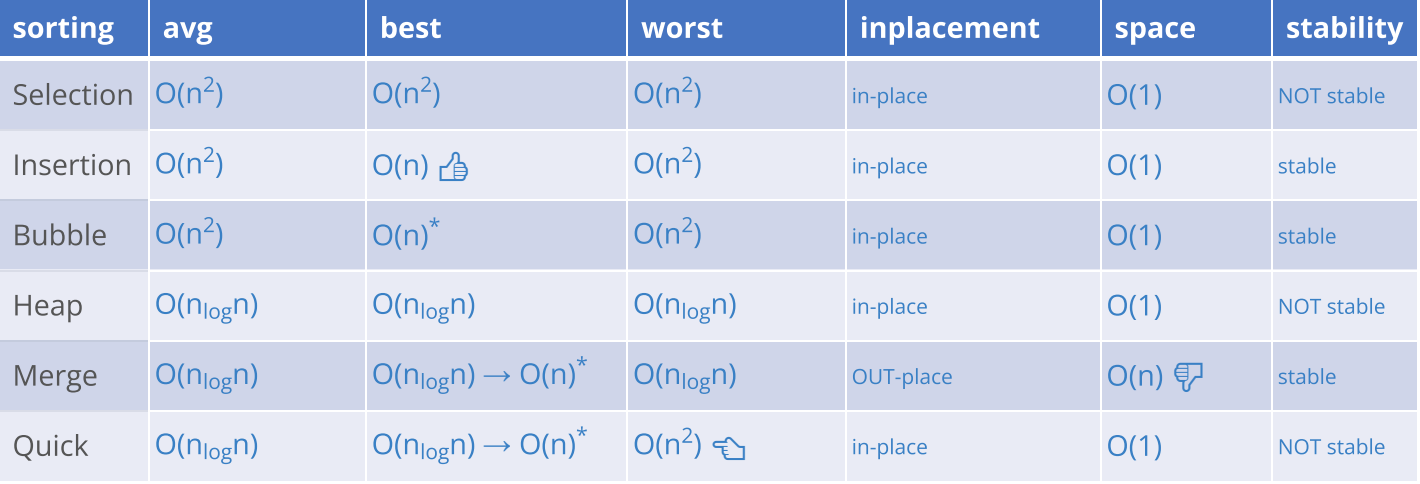 | 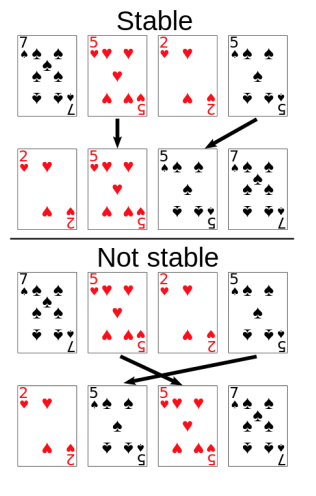 |

Stable sort algorithms sort equal elements in the same order that they appear in the input.

Simple sorts: Selection, Insertion and Bubble.
Efficient sorts: Heap, Merge, Quick.

### TMA03 Question

#### Question 5

Which of the following operations are best implemented by first sorting the list of numbers?
For each operation, briefly describe an algorithm to implement it, and state the algorithm’s
asymptotic complexity.

- (a) Find the minimum value.
- (b) Find the maximum value.
- (c) Compute the arithmetic mean.
- (d) Find the median (i.e., the middle value).
- (e) Find the mode (i.e., the value that appears the most times).

#### Question 7

Find the path with the maximum sum in a given binary tree. A path can be defined as a sequence of nodes between any two nodes and doesn’t necessarily pass through the root.

> Example 1: max sum = `16`, path = `[4,2,1,3,6]`
> 
> Example 2: max sum = `31`, path = `[8,5,3,6,9]`


- (a) This can be done directly in $O(n)$ worst case without sorting.
- (b) This can be done directly in $O(n)$ worst case without sorting.
- (c) This can be done directly in $O(n)$ worst case without sorting.
- (d) Sorting allows this to be done in $O(n\text{log}(n))$ time by first sorting and the selecting the value in the middle position. However, it is possible to use a variant on QuickSort to do this in $O(n)$ time in average case.
- (e) This is best done by sorting, then making a pass through array keeping track of the items seen the most times.

In [56]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

_sum = 0

def max_path_sum(root):
    global _sum
    # Complete your code here
    if root is None:
        return 0
    
    sum_left = max_path_sum(root.left)
    sum_right = max_path_sum(root.right)
    sum_left = sum_left if sum_left > 0 else 0
    sum_right = sum_right if sum_right > 0 else 0
    _sum = max(_sum, sum_left + sum_right + root.val)
    return max(sum_left + root.val, sum_right + root.val)

In [ ]:
def DAC_Min(a, index, l):
    min = 0;
    if (index >= l - 2):
        if (a[index] < a[index + 1]):
            return a[index];
        else:
            return a[index + 1];
 
    # Logic to find the Minimum element
    # in the given array.
    min = DAC_Min(a, index + 1, l);
 
    if (a[index] < min):
        return a[index];
    else:
        return min;
